<h2>EDA sobre *dataset* Titanic (Kaggle)</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Carregando o *dataset*

In [8]:
df = pd.read_csv('./datasets/titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Hipóteses</h3>

* (**H1**) Passageiros da 3ª classe estavam mais propensos a não sobreviver?
* (**H2**) Mulheres e crianças estavam mais propensos a sobreviver?
* (**H3**) Passageiros com familiares a bordo possuiam menos chance de sobreviver?

<h3>H1</h3>

In [9]:
df.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

In [10]:
pd.crosstab([df['Survived']], df['Pclass'], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [24]:
df['Pclass'][df['Survived'] == 1].count()

df['child'] = [1 if x < 18 else 0 for x in df['Age']]

#df.loc[df['Age'] < 18, 'child'] = 1
#df.loc[df['Age'] >= 18, 'child'] = 0

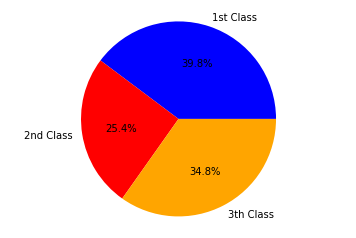

In [18]:

h1_lbl = '1st Class', '2nd Class', '3th Class'
h1_colors = 'blue', 'red', 'orange'
h1_df = df[df['Survived'] == 1]
h1_values = h1_df['Pclass'][h1_df['Pclass'] == 1].count(), h1_df['Pclass'][h1_df['Pclass'] == 2].count(), h1_df['Pclass'][h1_df['Pclass'] == 3].count()

plt.pie(h1_values, labels=h1_lbl, colors=h1_colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

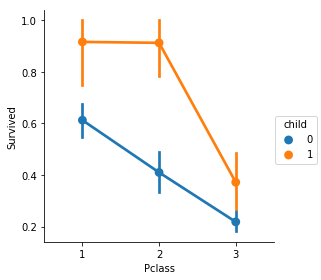

In [19]:
sns.factorplot('Pclass', 'Survived', hue='child', data=df)

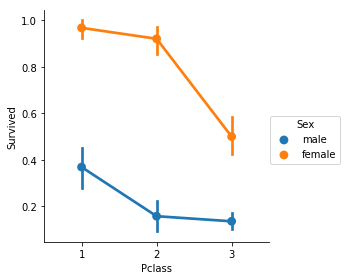

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)

<h3>H2</h3>

In [21]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

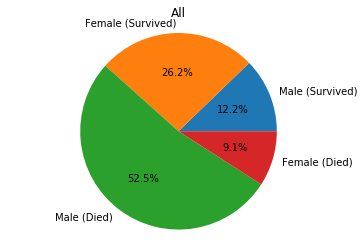

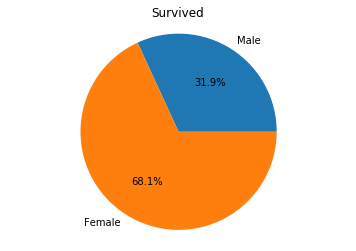

In [25]:
h2_labels = 'Male (Survived)', 'Female (Survived)', 'Male (Died)', 'Female (Died)'
h2_values = df['Survived'][(df['Survived'] == 1) & (df['Sex'] == 'male')].count(), df['Survived'][(df['Survived'] == 1) & (df['Sex'] == 'female')].count(), df['Survived'][(df['Survived'] == 0) & (df['Sex'] == 'male')].count(), df['Survived'][(df['Survived'] == 0) & (df['Sex'] == 'female')].count()
plt.pie(h2_values, labels=h2_labels, autopct='%1.1f%%')
plt.title('All')
plt.axis('equal')
plt.show()

plt.clf()

h2_labels = 'Male', 'Female'
h2_values = df['Survived'][(df['Survived'] == 1) & (df['Sex'] == 'male')].count(), df['Survived'][(df['Survived'] == 1) & (df['Sex'] == 'female')].count()
plt.pie(h2_values, labels=h2_labels, autopct='%1.1f%%')
plt.title('Survived')
plt.axis('equal')
plt.show()


In [26]:
pd.crosstab([df['child'], df['Sex']], df['Survived'], margins=True)

Survived        0    1  All
child Sex                  
0     female   64  195  259
      male    433   86  519
1     female   17   38   55
      male     35   23   58
All           549  342  891

<h3>H3</h3>

In [27]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['WithFamily'] = 0
df['WithFamily'][df['FamilySize'] > 0] = 1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df.groupby('WithFamily')['Survived'].value_counts()

WithFamily  Survived
0           0           374
            1           163
1           1           179
            0           175
Name: Survived, dtype: int64

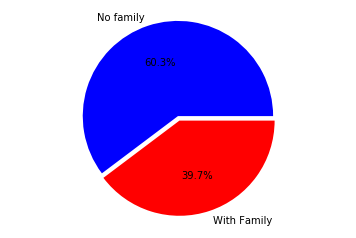

In [29]:
labels = 'No family', 'With Family'
values = df['WithFamily'][df['WithFamily'] == 0].count(), df['WithFamily'][df['WithFamily'] == 1].count()
colors = ['blue', 'red']
explode = (0.05, 0)

plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

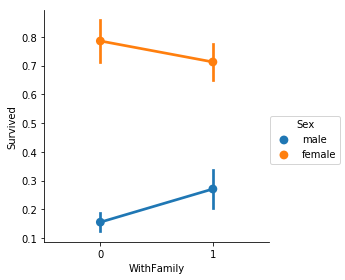

In [30]:
sns.factorplot('WithFamily', 'Survived', hue='Sex', data=df)